**Implement both versions of quicksort random and non-random choice for the pivot**

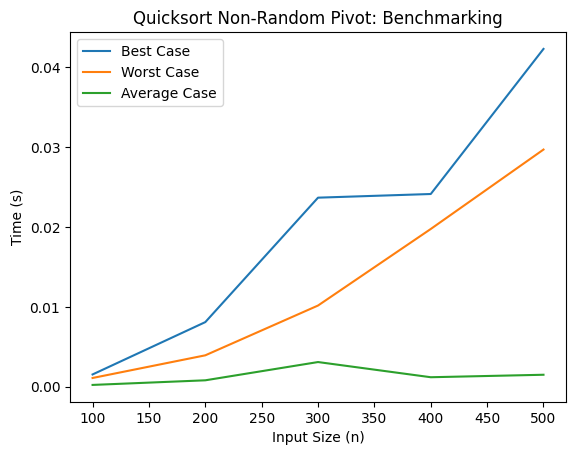

In [1]:
import time
import random
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]  # Choosing the last element as the pivot
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quicksort(arr, low, pivot_index - 1)
        quicksort(arr, pivot_index + 1, high)

def generate_array(size, case):
    if case == 'best':
        return list(range(1, size + 1))
    elif case == 'worst':
        return list(range(size, 0, -1))
    elif case == 'average':
        return [random.randint(1, size) for _ in range(size)]

def benchmark_sorting(case, sizes):
    timings = []
    for size in sizes:
        arr = generate_array(size, case)
        start_time = time.time()
        quicksort(arr, 0, len(arr) - 1)
        end_time = time.time()
        timings.append(end_time - start_time)
    return timings

# Benchmarking
sizes = [100, 200, 300, 400, 500]
best_case_timings = benchmark_sorting('best', sizes)
worst_case_timings = benchmark_sorting('worst', sizes)
average_case_timings = benchmark_sorting('average', sizes)

# Plotting
plt.plot(sizes, best_case_timings, label='Best Case')
plt.plot(sizes, worst_case_timings, label='Worst Case')
plt.plot(sizes, average_case_timings, label='Average Case')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (s)')
plt.title('Quicksort Non-Random Pivot: Benchmarking')
plt.legend()
plt.show()